In [1]:
# put the data into csv file than store them into excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

# Clean Data

In [2]:
all_in_one =pd.read_excel('All in one.xlsx')
all_in_one = all_in_one[1:]

In [3]:
all_in_one = all_in_one.dropna(axis=0,how='any')

In [4]:
len(all_in_one)

3017

In [5]:
all_in_one.head()

,,,Smoking,Diet and Exercise,Alcohol Use,Unsafe Sex,Access to Care,Quality of Care,Education,Employment,Income,Family and Social Support,...,Children in poverty,Inadequate social support,Single-parent households,Air pollution-particulate matter days,Air pollution-ozone days,Access to healthy foods,Access to recreational facilities,Morbidity,Mortality,% diabetic
01001,Alabama,Autauga,0.0938306,-0.0571465,0.0135674,-0.0289311,-0.0468853,-0.0779834,-0.100128,-0.093871,-0.148863,0.00706276,...,-1.48863,1.01962,-0.737109,-0.0647799,-0.412772,1.32821,-0.22868,0.00222031,-0.245468,11.4
01003,Alabama,Baldwin,-0.0341972,-0.200053,0.0345449,-0.0411685,0.00926618,-0.103639,-0.0907895,-0.0968334,-0.146281,-0.031977,...,-1.46281,-0.467382,-0.811697,-0.54703,2.5428,0.170905,-1.81367,-0.532552,-0.692779,9.8
01005,Alabama,Barbour,-0.0109194,0.107331,-0.0212422,0.0424269,-0.0139468,-0.0629271,0.129484,0.0275909,0.0705686,-0.0162987,...,0.705686,-2.04059,1.38864,0.899721,-0.412772,-0.895737,-0.492844,0.264392,-0.356481,13.6
01007,Alabama,Bibb,0.224186,-0.0355757,0.0348969,-0.00460873,0.0915524,-0.0397545,0.0833312,-0.00203394,-0.0184946,0.0113462,...,-0.184946,0.976518,-0.52267,-0.54703,-0.20166,-1.46639,-1.02117,-0.0651064,0.655758,11.1
01009,Alabama,Blount,-0.0248861,-0.0463611,-0.0429961,-0.0403639,0.12712,0.0423981,-0.0202694,-0.087946,-0.117884,-0.0776463,...,-1.17884,-1.84663,-1.25922,-0.0647799,-0.20166,-0.453081,0.0354848,-0.17326,-0.651136,11.4


In [6]:
# Data were store as Object data type; therefore, convert it to float
all_in_one = all_in_one.astype(float)
all_in_one.head()

,,,Smoking,Diet and Exercise,Alcohol Use,Unsafe Sex,Access to Care,Quality of Care,Education,Employment,Income,Family and Social Support,...,Children in poverty,Inadequate social support,Single-parent households,Air pollution-particulate matter days,Air pollution-ozone days,Access to healthy foods,Access to recreational facilities,Morbidity,Mortality,% diabetic
01001,Alabama,Autauga,0.093831,-0.057146,0.013567,-0.028931,-0.046885,-0.077983,-0.100128,-0.093871,-0.148863,0.007063,...,-1.488626,1.019620,-0.737109,-0.064780,-0.412772,1.328213,-0.228680,0.002220,-0.245468,11.4
01003,Alabama,Baldwin,-0.034197,-0.200053,0.034545,-0.041169,0.009266,-0.103639,-0.090790,-0.096833,-0.146281,-0.031977,...,-1.462810,-0.467382,-0.811697,-0.547030,2.542804,0.170905,-1.813666,-0.532552,-0.692779,9.8
01005,Alabama,Barbour,-0.010919,0.107331,-0.021242,0.042427,-0.013947,-0.062927,0.129484,0.027591,0.070569,-0.016299,...,0.705686,-2.040586,1.388638,0.899721,-0.412772,-0.895737,-0.492844,0.264392,-0.356481,13.6
01007,Alabama,Bibb,0.224186,-0.035576,0.034897,-0.004609,0.091552,-0.039755,0.083331,-0.002034,-0.018495,0.011346,...,-0.184946,0.976518,-0.522670,-0.547030,-0.201660,-1.466391,-1.021173,-0.065106,0.655758,11.1
01009,Alabama,Blount,-0.024886,-0.046361,-0.042996,-0.040364,0.127120,0.042398,-0.020269,-0.087946,-0.117884,-0.077646,...,-1.178840,-1.846629,-1.259223,-0.064780,-0.201660,-0.453081,0.035485,-0.173260,-0.651136,11.4


In [7]:
# since they reverse the sign for some of the z-score I will change it back to the original data
for index, row in all_in_one.iterrows():
    # Food environment index
    row['Diet and Exercise'] = row['Diet and Exercise']*-1
    # Access to exercise opportunities
    row['Air Quality'] = row['Air Quality']*-1
    # ? Diabetes monitoring 
    row['Diabetic screening'] = row['Diabetic screening']*-1
    # ? Mammography screening
    row['Mammography screening'] = row['Mammography screening']*-1
    # High school graduation
    row['High school graduation'] = row['High school graduation']*-1
    # Some college (post-secondary education)
    row['Education'] = row['Education']*-1
    # Social associations
    row['Family and Social Support'] = row['Family and Social Support']*-1
    #
    row['Income'] = row['Income']*-1
    #
    row['Employment'] = row['Employment']*-1

In [8]:
# This chart contains all the correlation between each pair
all_in_one.corr()

,Smoking,Diet and Exercise,Alcohol Use,Unsafe Sex,Access to Care,Quality of Care,Education,Employment,Income,Family and Social Support,...,Children in poverty,Inadequate social support,Single-parent households,Air pollution-particulate matter days,Air pollution-ozone days,Access to healthy foods,Access to recreational facilities,Morbidity,Mortality,% diabetic
Smoking,1.000000,-0.262646,0.227979,0.251923,0.039534,0.243747,-0.334332,-0.262812,-0.256380,-0.291878,...,0.256380,0.259187,0.213967,-0.058444,-0.094005,0.086140,0.104370,0.381522,0.355895,0.122463
Diet and Exercise,-0.262646,1.000000,-0.112285,-0.394659,-0.086300,-0.259987,0.403946,0.248611,0.372329,0.404042,...,-0.372329,-0.285235,-0.359808,0.010554,0.138633,-0.107783,-0.233847,-0.379358,-0.409031,-0.292325
Alcohol Use,0.227979,-0.112285,1.000000,-0.001319,0.231708,0.166372,-0.141076,-0.084091,-0.137650,-0.071411,...,0.137650,0.064313,0.051571,-0.033880,-0.113597,0.131633,0.068746,0.058437,0.268451,0.093841
Unsafe Sex,0.251923,-0.394659,-0.001319,1.000000,-0.107442,0.229889,-0.484366,-0.292503,-0.510560,-0.611880,...,0.510560,0.357445,0.609342,0.115331,0.026121,-0.051864,0.111757,0.459436,0.463960,0.185594
Access to Care,0.039534,-0.086300,0.231708,-0.107442,1.000000,0.097263,-0.219650,-0.054465,-0.115921,0.070833,...,0.115921,0.014560,-0.118922,-0.124407,-0.203170,0.127932,0.239344,-0.047663,0.001785,0.019785
Quality of Care,0.243747,-0.259987,0.166372,0.229889,0.097263,1.000000,-0.322008,-0.245819,-0.415994,-0.247438,...,0.415994,0.229834,0.172644,-0.063930,-0.133771,0.094404,0.224806,0.341999,0.402998,0.164892
Education,-0.334332,0.403946,-0.141076,-0.484366,-0.219650,-0.322008,1.000000,0.395558,0.589374,0.459220,...,-0.589374,-0.332534,-0.401727,0.038323,0.189292,-0.114664,-0.261828,-0.446903,-0.509406,-0.225669
Employment,-0.262812,0.248611,-0.084091,-0.292503,-0.054465,-0.245819,0.395558,1.000000,0.419652,0.331648,...,-0.419652,-0.222223,-0.305636,0.005285,0.081880,-0.028320,-0.183763,-0.345364,-0.369512,-0.171612
Income,-0.256380,0.372329,-0.137650,-0.510560,-0.115921,-0.415994,0.589374,0.419652,1.000000,0.578047,...,-1.000000,-0.352184,-0.563105,0.067063,0.230653,-0.156063,-0.280885,-0.548103,-0.655259,-0.323939
Family and Social Support,-0.291878,0.404042,-0.071411,-0.611880,0.070833,-0.247438,0.459220,0.331648,0.578047,1.000000,...,-0.578047,-0.770766,-0.834464,-0.076988,0.032665,-0.003657,-0.133197,-0.511498,-0.501029,-0.250915


In [9]:
all_in_one.corr()['% diabetic']

Smoking                                                              0.122463
Diet and Exercise                                                   -0.292325
Alcohol Use                                                          0.093841
Unsafe Sex                                                           0.185594
Access to Care                                                       0.019785
Quality of Care                                                      0.164892
Education                                                           -0.225669
Employment                                                          -0.171612
Income                                                              -0.323939
Family and Social Support                                           -0.250915
Community Safety                                                     0.127824
Air Quality                                                          0.085708
Built Environment                                               

# Graphs

# For most of the measures, a higher Z-score score indicates poorer health (e.g., years of potential life lost before age 75). However, for some of our measures (e.g., high school graduation) a higher score indicates better health or a more desirable value. We have to take this into account before computing summary scores. For these measures we compute the Z-score as usual but multiply it by -1, so that higher scores indicate poorer health. The measures that we reverse code in this manner are:

@Food environment index
@Access to exercise opportunities
@Diabetes monitoring
@Mammography screening
@High school graduation
@Some college (post-secondary education)
@Social associations

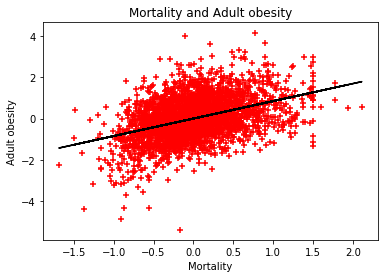

In [10]:
# 0.379358
# mortality and adult obesity

Mortality = all_in_one['Mortality']
Adult_obesity = all_in_one['Adult obesity']
plt.scatter(Mortality,Adult_obesity,marker = '+',color = 'r')
fit = np.polyfit(Mortality,Adult_obesity,1)
fig3R = plt.plot(Mortality, fit[0]*Mortality + fit[1], color = 'black')
plt.xlabel('Mortality')
plt.ylabel('Adult obesity')
plt.title('Mortality and Adult obesity')
plt.show()

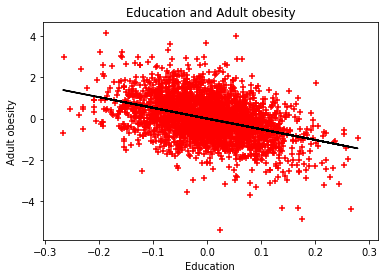

In [11]:
# -0.403946
# Education and Adult obesity
Education = all_in_one['Education']
Adult_obesity = all_in_one['Adult obesity']
plt.scatter(Education,Adult_obesity,marker = '+',color = 'r')
fit = np.polyfit(Education,Adult_obesity,1)
fig3R = plt.plot(Education, fit[0]*Education + fit[1], color = 'black')
plt.xlabel('Education')
plt.ylabel('Adult obesity')
plt.title('Education and Adult obesity')
plt.show()

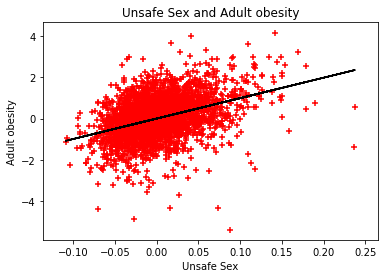

In [12]:
# 0.394659
# Unsafe Sex and Adult obesity
Unsafe_Sex = all_in_one['Unsafe Sex']
Adult_obesity = all_in_one['Adult obesity']
plt.scatter(Unsafe_Sex,Adult_obesity,marker = '+',color = 'r')
fit = np.polyfit(Unsafe_Sex,Adult_obesity,1)
fig3R = plt.plot(Unsafe_Sex, fit[0]*Unsafe_Sex + fit[1], color = 'black')
plt.xlabel('Unsafe Sex')
plt.ylabel('Adult obesity')
plt.title('Unsafe Sex and Adult obesity')
plt.show()

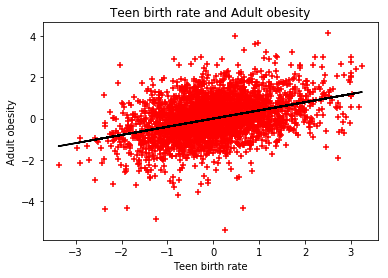

In [13]:
# 0.389539
# Teen birth rate and Adult obesity
Teen_birth_rate = all_in_one['Teen birth rate']
Adult_obesity = all_in_one['Adult obesity']
plt.scatter(Teen_birth_rate,Adult_obesity,marker = '+',color = 'r')
fit = np.polyfit(Teen_birth_rate,Adult_obesity,1)
fig3R = plt.plot(Teen_birth_rate, fit[0]*Teen_birth_rate + fit[1], color = 'black')
plt.xlabel('Teen birth rate')
plt.ylabel('Adult obesity')
plt.title('Teen birth rate and Adult obesity')
plt.show()

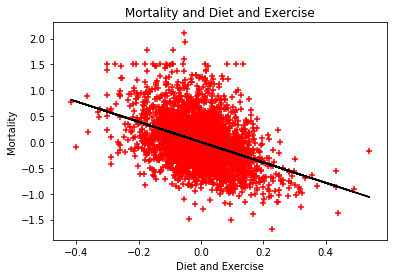

In [14]:
# -0.409031
# Mortality and Diet and Exercise
Mortality = all_in_one['Mortality']
Diet_and_Exercise = all_in_one['Diet and Exercise']
plt.scatter(Diet_and_Exercise,Mortality,marker = '+',color = 'r')
fit = np.polyfit(Diet_and_Exercise,Mortality,1)
fig3R = plt.plot(Diet_and_Exercise, fit[0]*Diet_and_Exercise + fit[1], color = 'black')
plt.ylabel('Mortality')
plt.xlabel('Diet and Exercise')
plt.title('Mortality and Diet and Exercise')
plt.show()

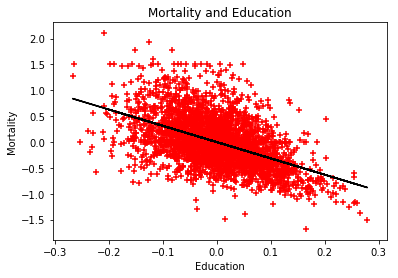

In [15]:
# -0.509406
# Mortality and Education
Mortality = all_in_one['Mortality']
Education = all_in_one['Education']
plt.scatter(Education,Mortality,marker = '+',color = 'r')
fit = np.polyfit(Education,Mortality,1)
fig3R = plt.plot(Education, fit[0]*Education + fit[1], color = 'black')
plt.ylabel('Mortality')
plt.xlabel('Education')
plt.title('Mortality and Education')
plt.show()

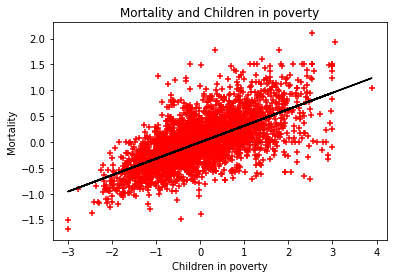

In [16]:
# 0.655259
# Mortality and Children in poverty
Mortality = all_in_one['Mortality']
Children_in_poverty = all_in_one['Children in poverty']
plt.scatter(Children_in_poverty,Mortality,marker = '+',color = 'r')
fit = np.polyfit(Children_in_poverty,Mortality,1)
fig3R = plt.plot(Children_in_poverty, fit[0]*Children_in_poverty + fit[1], color = 'black')
plt.ylabel('Mortality')
plt.xlabel('Children in poverty')
plt.title('Mortality and Children in poverty')
plt.show()

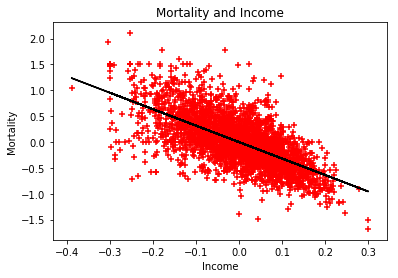

In [17]:
# Income -0.655259
# Mortality and Income
Mortality = all_in_one['Mortality']
Income = all_in_one['Income']
plt.scatter(Income,Mortality,marker = '+',color = 'r')
fit = np.polyfit(Income,Mortality,1)
fig3R = plt.plot(Income, fit[0]*Income + fit[1], color = 'black')
plt.ylabel('Mortality')
plt.xlabel('Income')
plt.title('Mortality and Income')
plt.show()

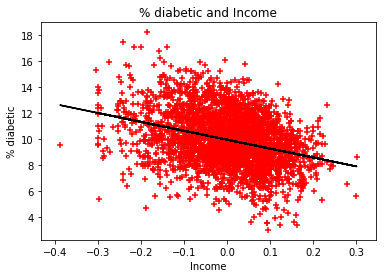

In [18]:
# -0.323939
# diabetic and Income
diabetic = all_in_one['% diabetic']
Income = all_in_one['Income']
plt.scatter(Income,diabetic,marker = '+',color = 'r')
fit = np.polyfit(Income,diabetic,1)
fig3R = plt.plot(Income, fit[0]*Income + fit[1], color = 'black')
plt.ylabel('% diabetic')
plt.xlabel('Income')
plt.title('% diabetic and Income')
plt.show()

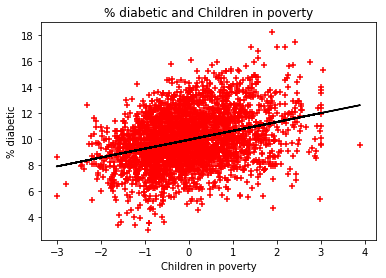

In [19]:
# 0.323939
# diabetic and Children in poverty
diabetic = all_in_one['% diabetic']
Income = all_in_one['Children in poverty']
plt.scatter(Income,diabetic,marker = '+',color = 'r')
fit = np.polyfit(Income,diabetic,1)
fig3R = plt.plot(Income, fit[0]*Income + fit[1], color = 'black')
plt.ylabel('% diabetic')
plt.xlabel('Children in poverty')
plt.title('% diabetic and Children in poverty')
plt.show()

# overall outcome and factor

In [20]:
out_fac =pd.read_excel('outcome and factor.xlsx')
out_fac = out_fac[1:]
out_fac = out_fac.dropna(axis=0,how='any')
# Data were store as Object data type; therefore, convert it to float
out_fac = out_fac.astype(float)
out_fac.corr()

,Health Outcomes,Health Factors
Health Outcomes,1.000000,0.731492
Health Factors,0.731492,1.000000


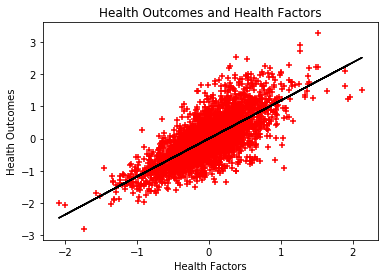

In [21]:
# 0.731492
# Health Outcomes and Health Factors

outcome = out_fac['Health Outcomes']
factor = out_fac['Health Factors']
plt.scatter(factor,outcome,marker = '+',color = 'r')
fit = np.polyfit(factor,outcome,1)
fig3R = plt.plot(factor, fit[0]*factor + fit[1], color = 'black')
plt.xlabel('Health Factors')
plt.ylabel('Health Outcomes')
plt.title('Health Outcomes and Health Factors')
plt.show()